## Diabetes Prediction

Dataset : https://www.kaggle.com/datasets/mathchi/diabetes-data-set

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

Attribute Information : 
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df=pd.read_csv('E:/ML projects/Workspace/dataset/diabetes.csv')

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
df.shape

(768, 9)

In [12]:
# distribution of outcome variable
df.Outcome.value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

In [13]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
#checking for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Exploratory Data Analysis

<Axes: xlabel='Age', ylabel='Count'>

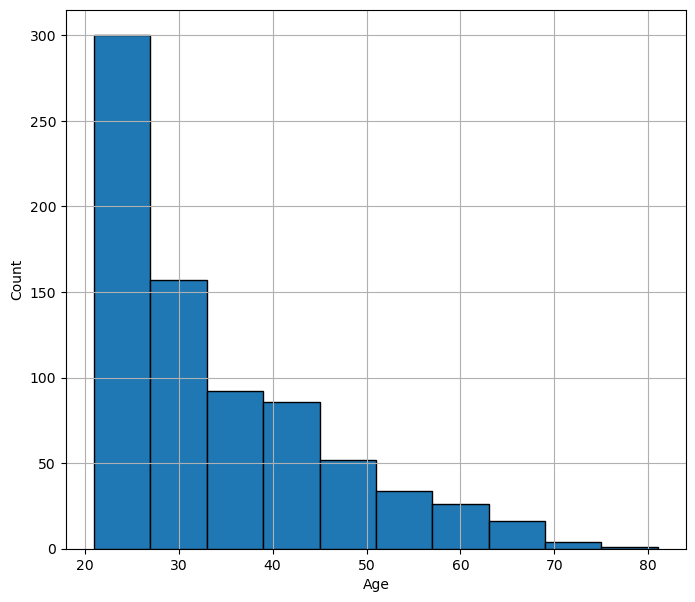

In [15]:
# plot the hist of the age variable
plt.figure(figsize=(8,7))
plt.xlabel('Age', fontsize=10)
plt.ylabel('Count', fontsize=10)
df['Age'].hist(edgecolor="black")

In [16]:
# getting the maximun age and minimum age
print(f"MAX AGE : {df['Age'].max()}")
print(f"MIN AGE : {df['Age'].min()}")

MAX AGE : 81
MIN AGE : 21


C:\Users\ramak\AppData\Local\Temp\ipykernel_47776\1315534964.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Pregnancies, bins=20, ax=ax[0,0], color="red")
C:\Users\ramak\AppData\Local\Temp\ipykernel_47776\1315534964.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Glucose, bins=2

<Axes: xlabel='Age', ylabel='Density'>

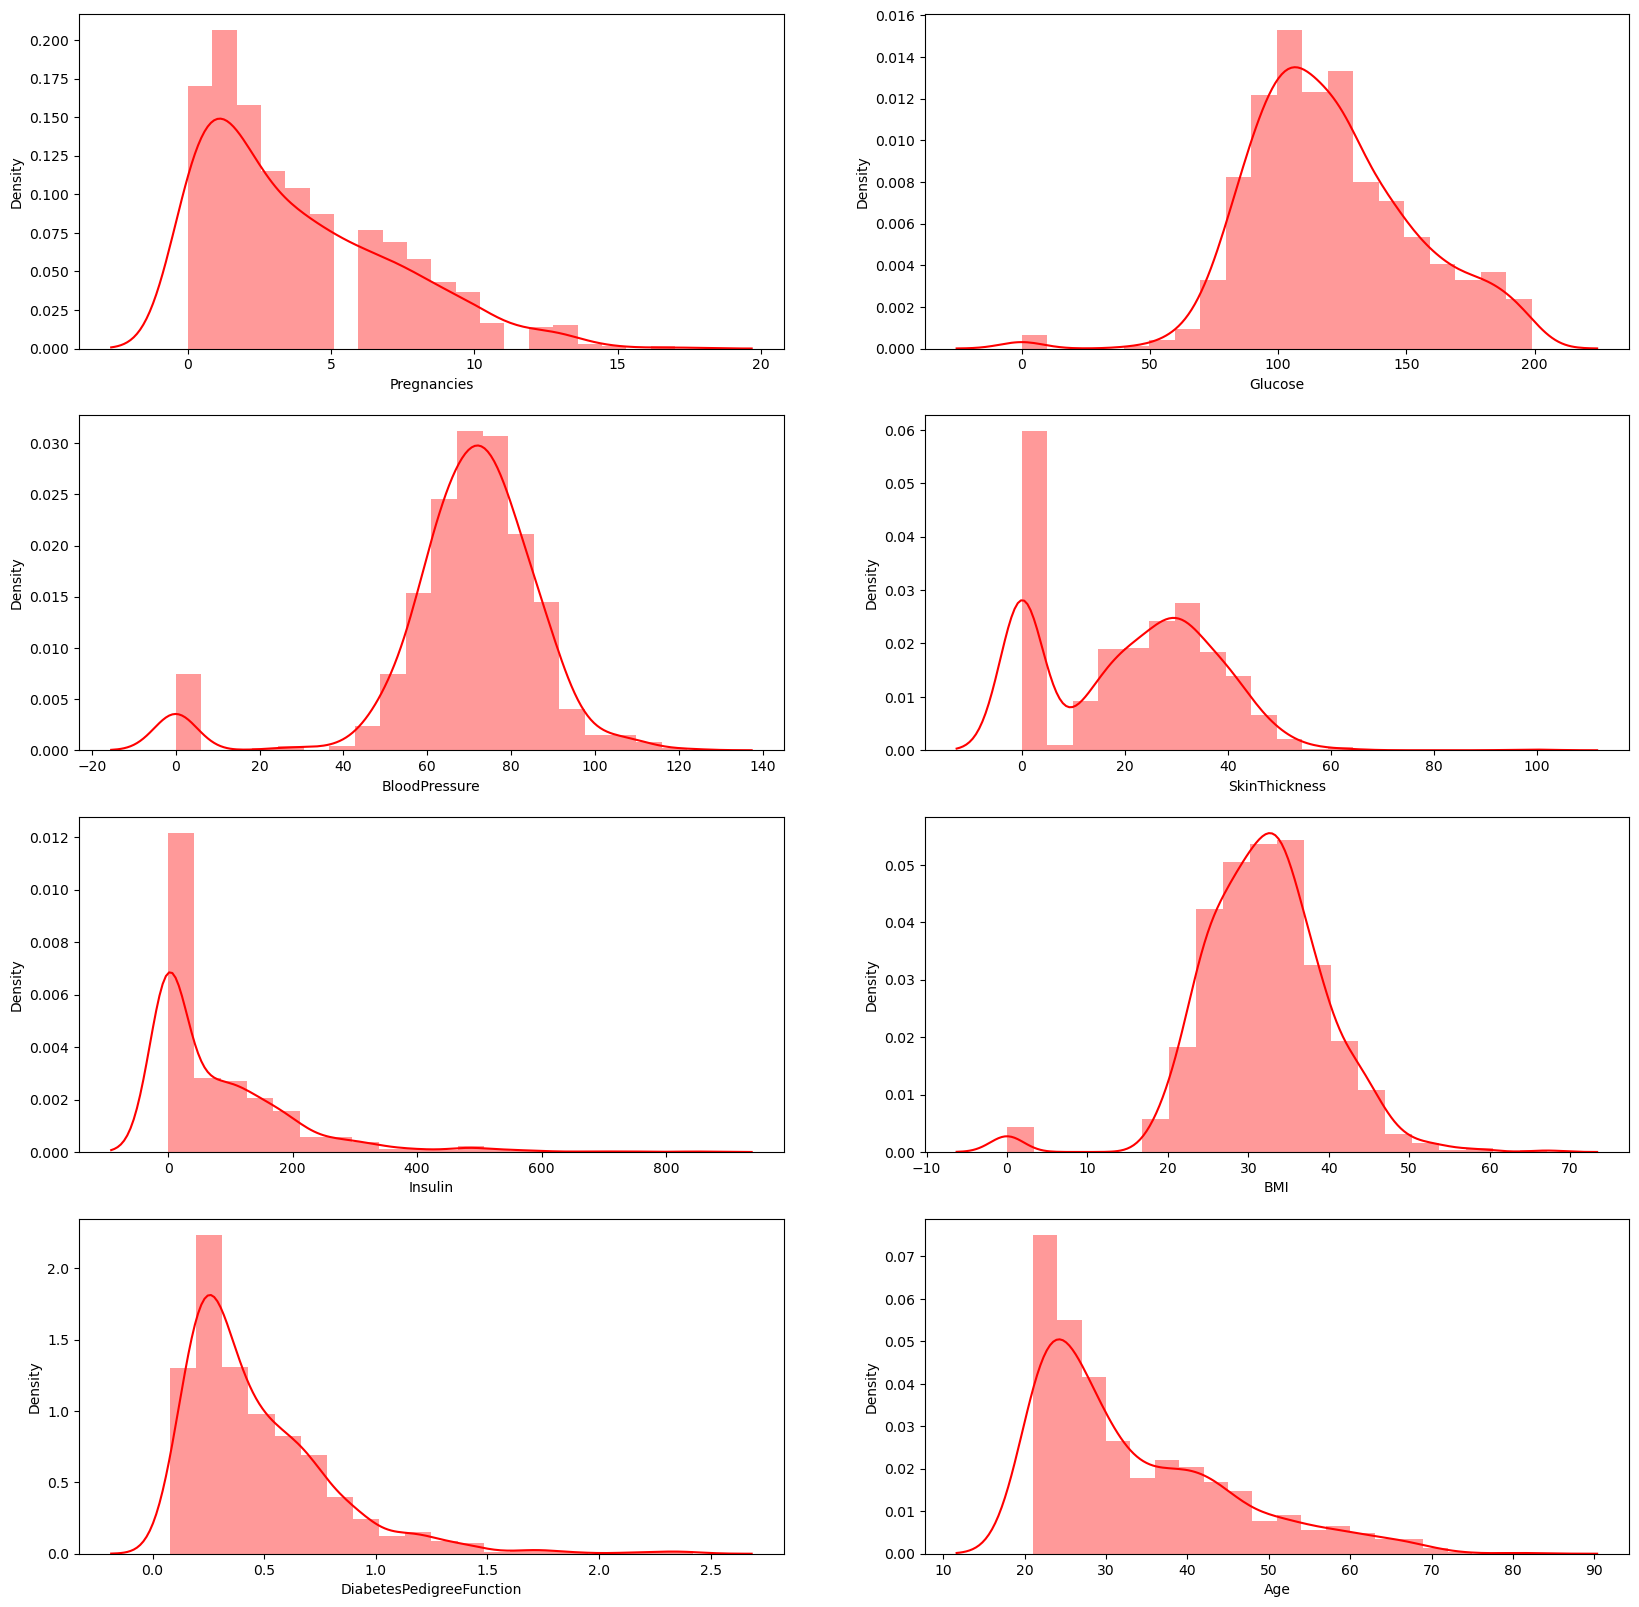

In [17]:

# density graph
# 4*2=8
# columns=2 figure
# having 4 row

# [0,0], [0,1]
# [1,0], [1,1]
# [2,0], [2,1]
# [3,0], [3,1]

fig,ax = plt.subplots(4,2, figsize=(20,20))
sns.distplot(df.Pregnancies, bins=20, ax=ax[0,0], color="red")
sns.distplot(df.Glucose, bins=20, ax=ax[0,1], color="red")
sns.distplot(df.BloodPressure, bins=20, ax=ax[1,0], color="red")
sns.distplot(df.SkinThickness, bins=20, ax=ax[1,1], color="red")
sns.distplot(df.Insulin, bins=20, ax=ax[2,0], color="red")
sns.distplot(df.BMI, bins=20, ax=ax[2,1], color="red")
sns.distplot(df.DiabetesPedigreeFunction, bins=20, ax=ax[3,0], color="red")
sns.distplot(df.Age, bins=20, ax=ax[3,1], color="red")

In [18]:
#getting the mean of pregnancies based on the Outcome
df.groupby("Outcome").agg({'Pregnancies':'mean'})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [19]:
#getting the mean of Glucose based on the Outcome
df.groupby("Outcome").agg({'Glucose':'mean'})

,Glucose
Outcome,
0,109.980000
1,141.257463


<Axes: xlabel='Outcome', ylabel='count'>

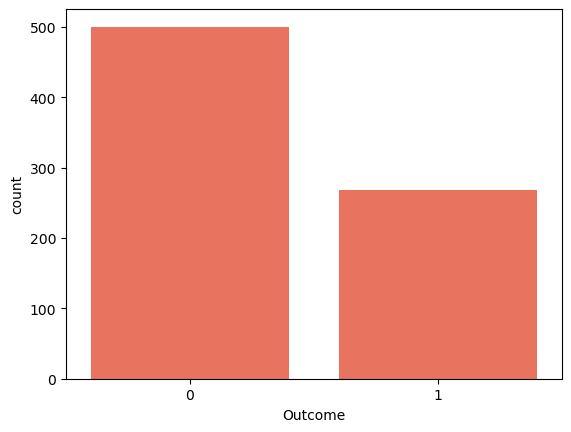

In [20]:
# 0>healthy
# 1>diabetes

sns.countplot(x='Outcome',data=df,color='tomato')

In [21]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

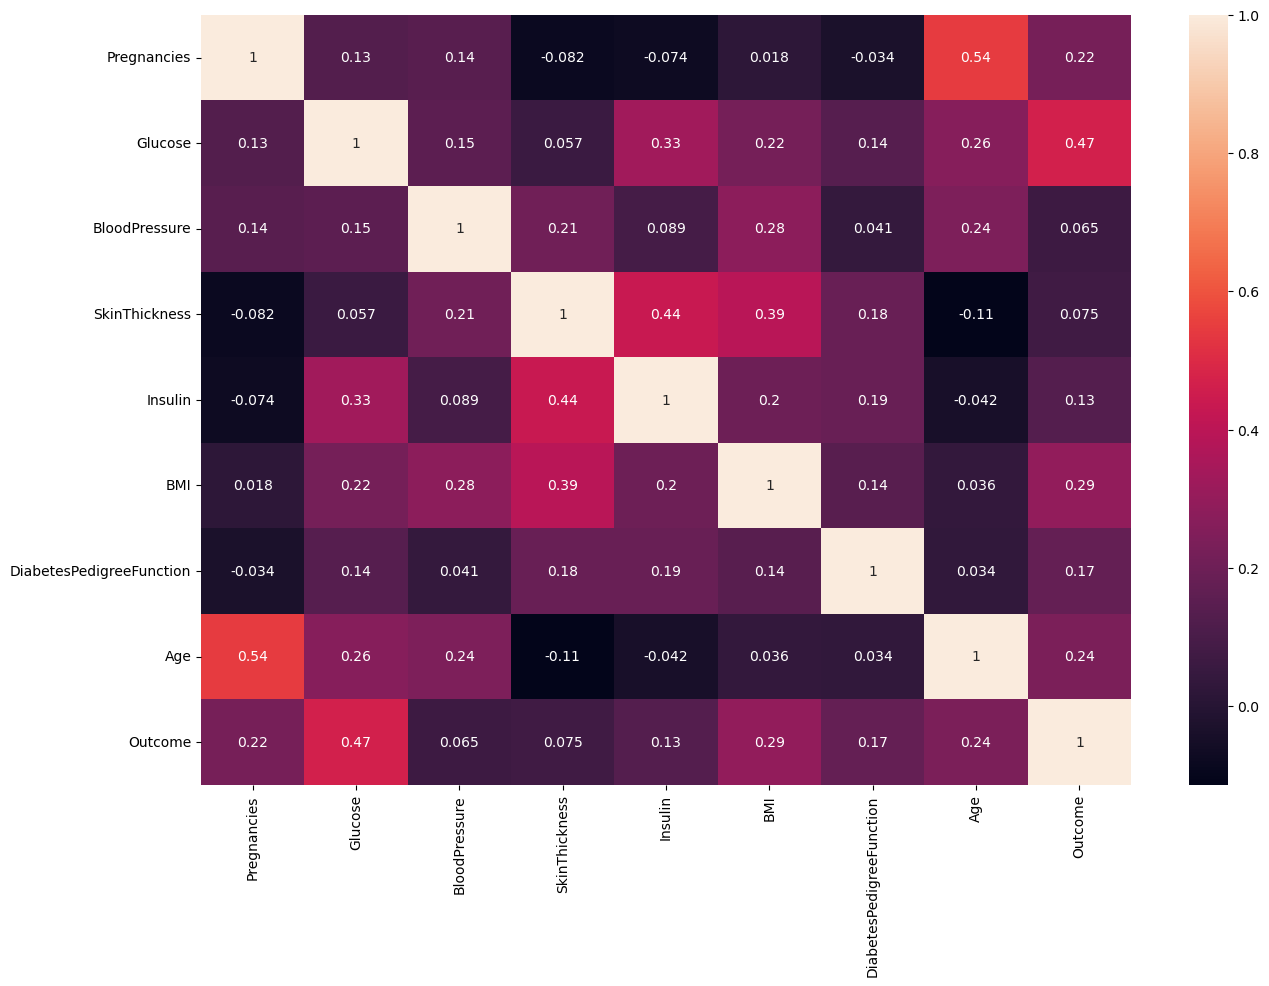

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [23]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [24]:
# checking for null values where 0 is null in all features except Outcome
for i in df.columns:
    if i!= df.columns[-1]:
        print(f"{i} - {df[df[i]==0].value_counts().sum()}")

Pregnancies - 111
Glucose - 5
BloodPressure - 35
SkinThickness - 227
Insulin - 374
BMI - 11
DiabetesPedigreeFunction - 0
Age - 0


In [25]:
df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.NaN)

In [26]:
# Data preprocessing Part
df.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [27]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [28]:
# fill the null values with their respected feature mean

df['Pregnancies']=df['Pregnancies'].fillna(round(df['Pregnancies'].mean(),1))
df['Glucose']=df['Glucose'].fillna(round(df['Glucose'].mean(),1))
df['BloodPressure']=df['BloodPressure'].fillna(round(df['BloodPressure'].mean(),1))
df['SkinThickness']=df['SkinThickness'].fillna(round(df['SkinThickness'].mean(),1))
df['Insulin']=df['Insulin'].fillna(round(df['Insulin'].mean(),1))
df['BMI']=df['BMI'].fillna(round(df['BMI'].mean(),1))

In [29]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [30]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,155.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,155.5,26.6,0.351,31,0
2,8.0,183.0,64.0,29.2,155.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,4.5,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [31]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: xlabel='Insulin'>

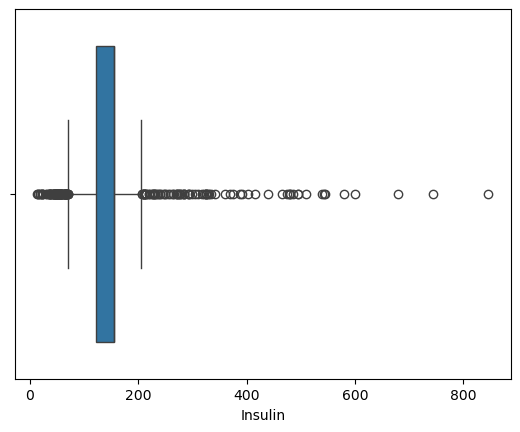

In [32]:
#removing outliers
sns.boxplot(x=df['Insulin'])

In [33]:
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['Insulin']>upper, "Insulin"] = upper
df.loc[df['Insulin']<lower, "Insulin"] = lower

<Axes: xlabel='Insulin'>

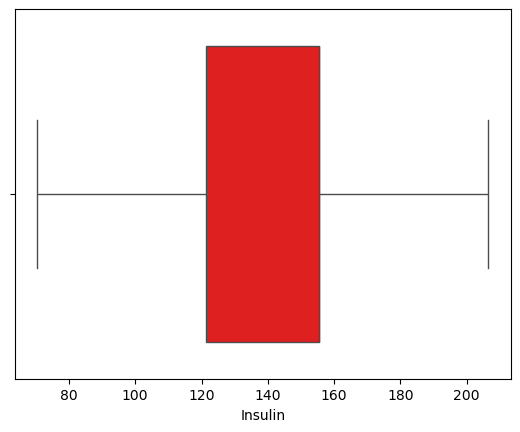

In [34]:
sns.boxplot(x= df["Insulin"], color="red")

In [35]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [36]:
# select independent and dependent 
x=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y=df['Outcome']

### split the data for train and test

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [38]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [39]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [40]:
x_train_scaled

array([[-0.15160865,  1.54122987, -0.05396883, ...,  1.6662032 ,
         0.05370085, -0.62107929],
       [ 0.5162811 , -0.46320525, -2.33850747, ..., -1.22713787,
         1.07195276,  0.14350752],
       [ 0.85022597,  2.33664063,  1.41466316, ...,  1.10524932,
        -0.03166159,  0.65323206],
       ...,
       [-0.48555353, -0.2086738 ,  0.10921251, ..., -0.88761315,
        -1.08040009, -0.79098747],
       [-1.15344328, -1.09953386, -3.48077679, ...,  3.34906483,
         0.10552804, -0.62107929],
       [ 0.18233622, -0.84500241,  0.10921251, ...,  0.19000877,
         1.63290591,  0.82314024]])

### model training - Support Vector Classifier (SVC)

In [52]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC(kernel='rbf')
svc.fit(x_train_scaled,y_train)
y_pred=svc.predict(x_test_scaled)
print('accuracy : ',accuracy_score(y_test,y_pred))

accuracy :  0.75


In [55]:
scaler

StandardScaler()

In [56]:
svc

SVC()

In [57]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(svc,open('svc.pkl','wb'))